# Wine clustering with Random Forest 

In [1]:
import pandas as pd
import numpy as np
import pylab as pl

from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv('../data/California_merged_data.csv')

In [3]:
data.head()
data.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,points,price,province_id,variety_numerical,vintage,norm_vintage,norm_price,norm_points,total_fires,sum_fire_size
count,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.0,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000,12638.000000
mean,17733.716569,62979.126128,65465.362083,89.807011,45.081342,7.0,365.913910,2012.680329,0.010754,0.019911,0.099061,27.408055,743.886172
std,10253.967859,36362.825618,37786.853715,2.811032,34.402675,0.0,207.408986,2.063994,0.001024,0.017090,0.028394,54.483173,7035.053366
min,0.000000,10.000000,10.000000,80.000000,5.000000,7.0,0.000000,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8878.250000,31569.250000,32809.250000,88.000000,26.000000,7.0,125.000000,2012.000000,0.010417,0.010432,0.080808,0.000000,0.000000
50%,17945.000000,63717.000000,66241.000000,90.000000,40.000000,7.0,440.000000,2013.000000,0.010913,0.017387,0.101010,0.000000,0.000000
75%,26663.500000,94876.750000,98610.250000,92.000000,55.000000,7.0,492.000000,2014.000000,0.011409,0.024839,0.121212,37.000000,89.660000
max,35419.000000,125084.000000,129950.000000,99.000000,2013.000000,7.0,702.000000,2016.000000,0.012401,0.997516,0.191919,415.000000,241890.150000


In [15]:
points = data.loc[:,'points']
points = np.array(points, dtype=pd.Series)
points = points.reshape(-1, 1)
cluster = KMeans(n_clusters = 3, random_state = 0).fit(points)
point_bins = cluster.labels_

data['point_bin'] = point_bins

(array([  20.,    0.,   19.,    0.,    0.,   70.,    0.,    0.,  118.,
           0.,    0.,  235.,    0.,    0.,  417.,    0.,    0.,  735.,
           0.,    0., 1032.,    0.,    0., 1560.,    0.,    0.,  962.,
           0.,    0., 1990.,    0.,    0., 1720.,    0.,    0., 1518.,
           0.,    0., 1234.,    0.,    0.,  700.,    0.,    0.,  222.,
           0.,    0.,   55.,    0.,    0.,   17.,    0.,    0.,   12.,
           0.,    2.]),
 array([80.        , 80.33928571, 80.67857143, 81.01785714, 81.35714286,
        81.69642857, 82.03571429, 82.375     , 82.71428571, 83.05357143,
        83.39285714, 83.73214286, 84.07142857, 84.41071429, 84.75      ,
        85.08928571, 85.42857143, 85.76785714, 86.10714286, 86.44642857,
        86.78571429, 87.125     , 87.46428571, 87.80357143, 88.14285714,
        88.48214286, 88.82142857, 89.16071429, 89.5       , 89.83928571,
        90.17857143, 90.51785714, 90.85714286, 91.19642857, 91.53571429,
        91.875     , 92.21428571, 92.55

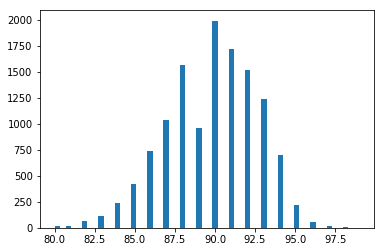

In [14]:
plt.hist(data['points'], bins='auto') 

In [16]:
X=data[['variety_numerical', 'price', 'vintage', 'total_fires', 'sum_fire_size', ]]  # Features
y=data['point_bin']  # Labels
x_name = (['variety_numerical', 'price', 'vintage', 'total_fires', 'sum_fire_size'])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.5075158227848101)


In [20]:
feature_imp = pd.Series(clf.feature_importances_,index=x_name).sort_values(ascending=False)
feature_imp

price                0.492345
variety_numerical    0.253526
vintage              0.122775
total_fires          0.066056
sum_fire_size        0.065298
dtype: float64

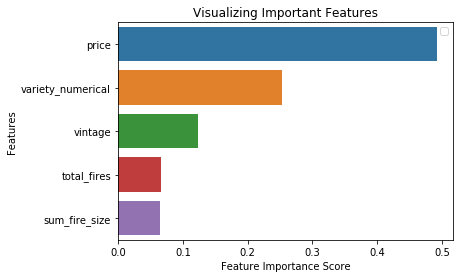

In [26]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [24]:

# Import train_test_split function
from sklearn.cross_validation import train_test_split
# Split dataset into features and labels
X=data[['price', 'variety_numerical']]  # Removed feature "sepal length"
y=data['point_bin']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [25]:
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.48502317169662035)
